Apply Keras to recognize some basic small images from teh CIFAR dataset
https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce

The individual images are only 32x32 pixels, of planes, automobiles, trucks, birds, cats, deer, dogs, frogs, horses, and ships. There are 60k images


In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


Start splitting and examining some of the data

(50000, 32, 32, 3) (50000, 1)
[6]


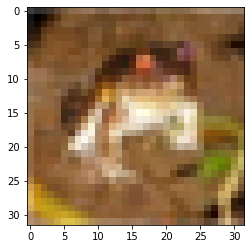

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)

plt.imshow(x_train[0])
print(y_train[0])

output neurons are either active or inactive, so we need to translate the table of label outputs into a sequence of binary values: one hot encoding. Similarly, input neurons work best when recieving [0,1] inputs, so we can rescale the inputs by dividing, though we'll need to make it a float first.

In [3]:
y_train_1h = keras.utils.to_categorical(y_train, 10)
y_test_1h = keras.utils.to_categorical(y_test, 10)
print(y_train_1h[0])

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

x_train /= 255
x_test /= 255

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


architecture of the image processing network
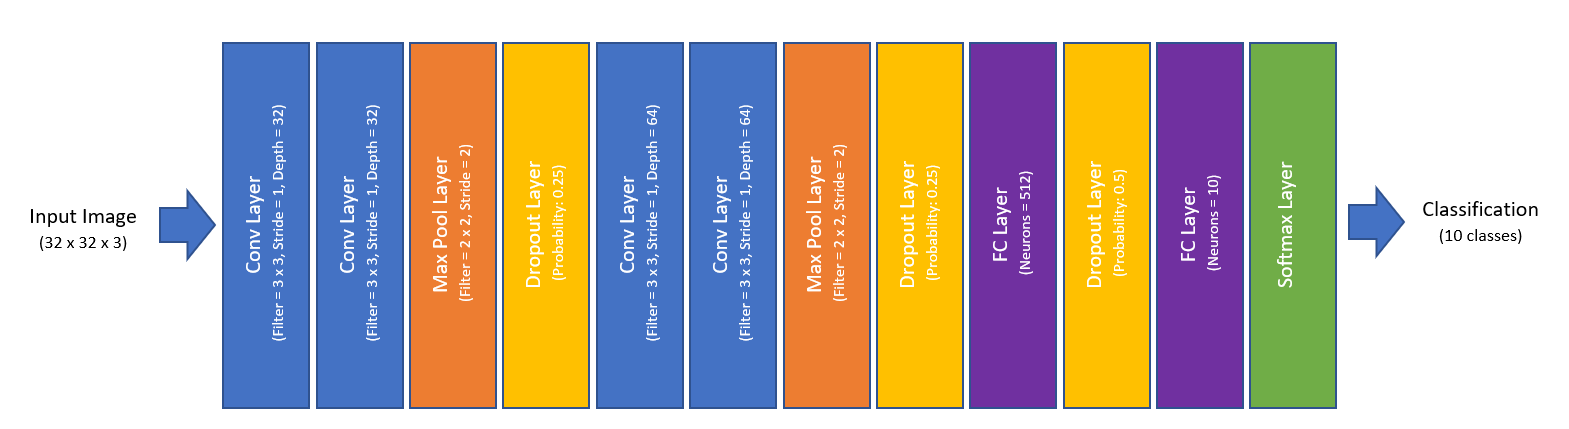

Start with an empty sequential model, which we'll add to layer by layer with the add function.

In [4]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(64,(3,3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
______________________

In [5]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(x_train, y_train_1h, batch_size=32, epochs=20, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 180s 5ms/step - loss: 1.5744 - acc: 0.4241 - val_loss: 1.1992 - val_acc: 0.5708
Epoch 2/20
40000/40000 [==============================] - 180s 5ms/step - loss: 1.1484 - acc: 0.5900 - val_loss: 0.9693 - val_acc: 0.6574
Epoch 3/20
40000/40000 [==============================] - 179s 4ms/step - loss: 0.9666 - acc: 0.6588 - val_loss: 0.9064 - val_acc: 0.6833
Epoch 4/20
40000/40000 [==============================] - 179s 4ms/step - loss: 0.8579 - acc: 0.7004 - val_loss: 0.7860 - val_acc: 0.7230
Epoch 5/20
40000/40000 [==============================] - 179s 4ms/step - loss: 0.7790 - acc: 0.7259 - val_loss: 0.7237 - val_acc: 0.7468
Epoch 6/20
40000/40000 [==============================] - 179s 4ms/step - loss: 0.7264 - acc: 0.7454 - val_loss: 0.7049 - val_acc: 0.7560
Epoch 7/20
40000/40000 [==

In [6]:
model.save("cifar10_model.h5")

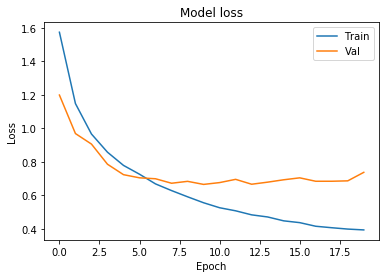

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

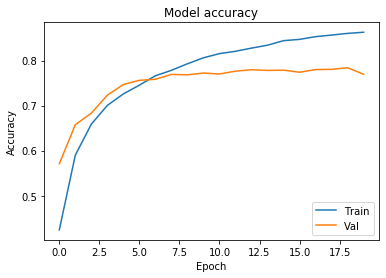

In [8]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [10]:
model.evaluate(x_test, y_test_1h)[1]

10000/10000 [==============================] - 7s 737us/step


0.7717